%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_pd = pd.read_csv(city_data_to_load)
ride_pd = pd.read_csv(ride_data_to_load)

In [5]:
city_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine the data into a single dataset
combined_data = pd.merge(ride_pd, city_pd, on="city", how="left")

# Cleaning up duplicates and nulls
combined_data = combined_data.dropna()
combined_data.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [8]:
combined_data.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [9]:
# Using GroupBy in order to separate the data into fields according to "state" values
combined_data.groupby(['city'])

In [10]:
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
urban = combined_data[combined_data["type"] == "Urban"]
urban.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
suburban = combined_data[combined_data["type"] == "Suburban"]
suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [13]:
rural = combined_data[combined_data["type"] == "Rural"]
rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


## Bubble Plot of Ride Sharing Data

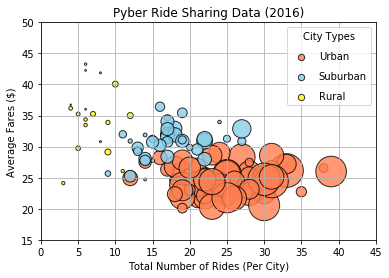

In [18]:
# Obtain the x and y coordinates for each of the three city types
#urban 
urbanride_count =  urban.groupby(["city"]).count()["ride_id"]
urban_avgFare = urban.groupby(["city"]).mean()["fare"]
urban_driver_count = urban.groupby(["city"]).sum()["driver_count"]

#suburban
suburban_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_avgFare = suburban.groupby(["city"]).mean()["fare"]
suburban_driver_count =suburban.groupby(["city"]).sum()["driver_count"]

#rural
rural_count = rural.groupby(["city"]).count()["ride_id"]
rural_avgFare = rural.groupby(["city"]).mean()["fare"]
rural_driver_count =rural.groupby(["city"]).sum()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urbanride_count, urban_avgFare, s=urban_driver_count/2, 
            c="coral", edgecolor="black", marker="o", alpha=0.8, label="Urban")

plt.scatter(suburban_count, suburban_avgFare, s=suburban_driver_count/2, 
            c="skyblue", edgecolor="black", marker="o", alpha=0.8, label="Suburban")

plt.scatter(rural_count, rural_avgFare, s=rural_driver_count/2, 
            c="yellow", edgecolor="black", marker="o", alpha=0.8, label="Rural")
                                                  
# Incorporate the other graph properties
# givin em titles 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

#givin em a grid
plt.grid()

#givin em a lil more space
plt.ylim(15, 50)
plt.xlim(0, 45)

# Create a legend 
lgnd = plt.legend(loc="best", title= "City Types", scatterpoints=1, labelspacing=1)


for lgnd in lgnd.legendHandles:
    lgnd.set_sizes([40])

# Incorporate a text label regarding circle size

# Save Figure
plt.show()

In [15]:
# Show plot
# plt.show()

## Total Fares by City Type

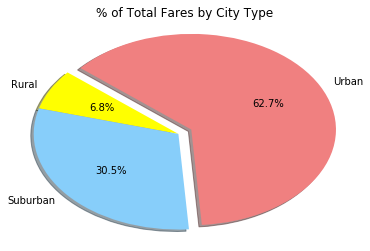

In [38]:
# Calculate Type Percents
type_percent = 100 * combined_data.groupby(["type"]).sum()["fare"] / combined_data["fare"].sum()

# # Build Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["yellow","lightskyblue","lightcoral"]

plt.pie(type_percent, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("tight")

# Save Figure
plt.savefig("../Images/PyPies.png")

In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

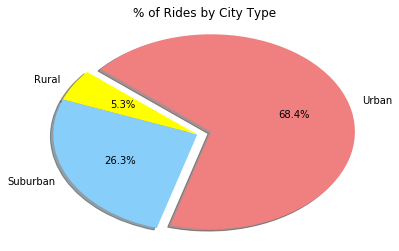

In [40]:
# Calculate Ride Percents
ride_percent = 100 * combined_data.groupby(["type"]).count()["ride_id"] / combined_data["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["yellow","lightskyblue","lightcoral"]

plt.pie(ride_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Rides by City Type")

# Create axes which are equal so we have a perfect circle
# I made my pie circle look like the one in the example but i know if I remove "tight" it'll be a regular circle
plt.axis("tight")

# Save Figure
plt.savefig("../Images/PyPies.png")


In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

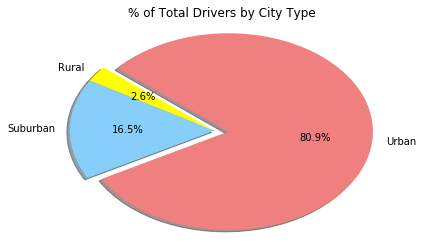

In [17]:
# Calculate Driver Percents
driver_percent = 100 * city_pd.groupby(["type"]).sum()["driver_count"] / combined_data["driver_count"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["yellow","lightskyblue","lightcoral"]

plt.pie(driver_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("tight")

# Save Figure
plt.savefig("../Images/PyPies.png")

In [30]:
# Show Figure
plt.show()